# Multiple Linear Regression 
Equation: $y = b_0 + b_1x_1 + b_2x_2.... + b_nx_n$   
Assumption:  
There is a linear relationship between both the dependent and independent variables.  
It also assumes no major correlation between the independent variables.  

Multiple regressions can be linear and nonlinear. 



In [6]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv("Data/Regression/Largecap_Balancesheet.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 5].values

# Encoding categorical data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# The first argument is an array called transformers, which is a list of tuples- Name, Transformer, Column
#remainder - by default it will drop other columns, but we want other columns
ct = ColumnTransformer([("Country", OneHotEncoder(), [4])], remainder = 'passthrough')
X = ct.fit_transform(X)

# Avoiding the Dummy Variable Trap
X = X[:, 1:]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

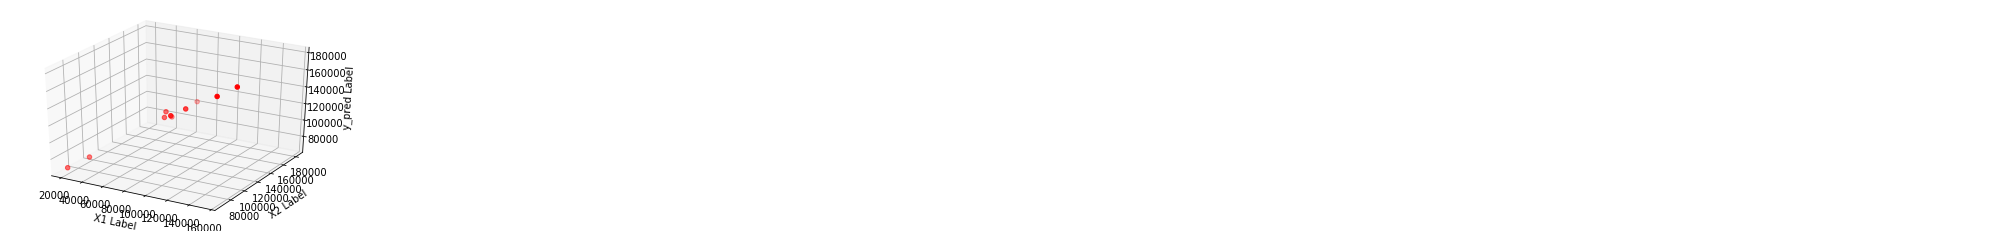

In [7]:
# Visualising the results in 3D by selecting 2 reading from independent variable(X)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x1 = X_test[:, [2]]
x2 = X_test[:, [3]]
ax.scatter(x1, x2, y_pred, c='r', marker='o')
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('y_pred Label')

plt.show()

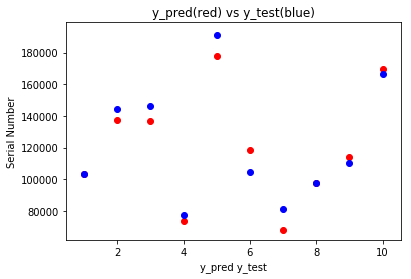

In [8]:
# Visualising the results
from mpl_toolkits.mplot3d import Axes3D
x_serial = list(range(1, len(y_pred) + 1))
plt.scatter(x_serial, y_pred, color = 'red')
plt.scatter(x_serial, y_test, color = 'blue')
plt.title('y_pred(red) vs y_test(blue)')
plt.xlabel('y_pred y_test')
plt.ylabel('Serial Number')
plt.show()